# Example 2: Deep Formulas

The orignal Kolmogorov-Arnold theorem says that it suffices to have 2-Layer function composition (inner and outer functions), but the functions might be non-smooth or even fractal. We generalize KA representation to arbitrary depths. An example a 2-Layer KAN (with smooth activations) is unable to do is: $f(x_1,x_2,x_3,x_4)={\rm exp}({\rm sin}(x_1^2+x_2^2)+{\rm sin}(x_3^2+x_4^2))$, which requires at least 3-Layer KANs.

### Three-layer KAN

In [1]:
from kan import KAN, create_dataset
import torch

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[4,2,1,1], grid=3, k=3, seed=0)
f = lambda x: torch.exp((torch.sin(torch.pi*(x[:,[0]]**2+x[:,[1]]**2))+torch.sin(torch.pi*(x[:,[2]]**2+x[:,[3]]**2)))/2)
dataset = create_dataset(f, n_var=4, train_num=3000)

# train the model
model.train(dataset, opt="LBFGS", steps=20, lamb=0.001, lamb_entropy=2.);

train loss: 1.37e-02 | test loss: 1.39e-02 | reg: 6.60e+00 : 100%|██| 20/20 [00:14<00:00,  1.36it/s]


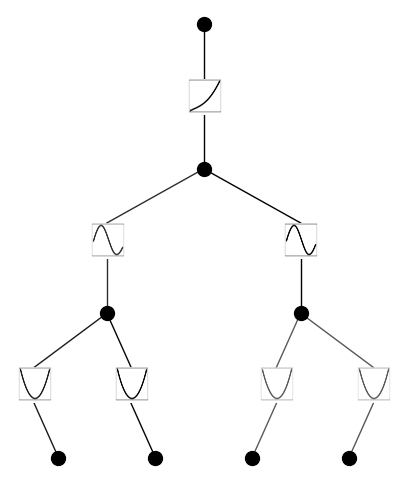

In [2]:
model.plot(beta=10)

In [3]:
# it seems that removing edge manually does not change results too much. We include both for completeness.
remove_edge = True

if remove_edge == True:
    model.remove_edge(0,0,1)
    model.remove_edge(0,1,1)
    model.remove_edge(0,2,0)
    model.remove_edge(0,3,0)
else:
    pass

In [4]:
grids = [3,5,10,20,50]
#grids = [5]

train_rmse = []
test_rmse = []

for i in range(len(grids)):
    model = KAN(width=[4,2,1,1], grid=grids[i], k=3, seed=0).initialize_from_another_model(model, dataset['train_input'])
    results = model.train(dataset, opt="LBFGS", steps=50, stop_grid_update_step=30);
    train_rmse.append(results['train_loss'][-1].item())
    test_rmse.append(results['test_loss'][-1].item())

train loss: 4.68e-03 | test loss: 4.65e-03 | reg: 7.18e+00 : 100%|██| 50/50 [00:34<00:00,  1.43it/s]
train loss: 1.85e-03 | test loss: 1.88e-03 | reg: 7.27e+00 : 100%|██| 50/50 [00:32<00:00,  1.54it/s]
train loss: 1.67e-04 | test loss: 1.58e-04 | reg: 7.15e+00 : 100%|██| 50/50 [00:39<00:00,  1.27it/s]
train loss: 1.49e-05 | test loss: 1.33e-05 | reg: 7.15e+00 : 100%|██| 50/50 [00:49<00:00,  1.01it/s]
train loss: 7.81e-07 | test loss: 1.24e-06 | reg: 7.15e+00 : 100%|██| 50/50 [01:34<00:00,  1.89s/it]


[0.004676620056267991, 0.0018545762361784552, 0.00016712565490647625, 1.4944049254287644e-05, 7.806967964665928e-07]
[0.004653487688711824, 0.0018804239846781038, 0.00015800498480465517, 1.3296794382010341e-05, 1.2418843339589226e-06]


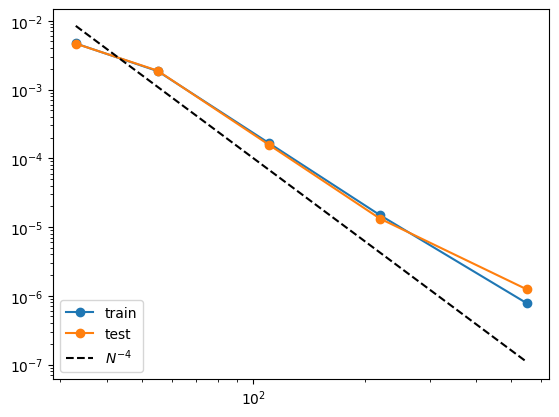

In [5]:
import numpy as np
import matplotlib.pyplot as plt

n_params = np.array(grids) * (4*2+2*1+1*1)
plt.plot(n_params, train_rmse, marker="o")
plt.plot(n_params, test_rmse, marker="o")
plt.plot(n_params, 10000*n_params**(-4.), color="black", ls="--")
plt.legend(['train', 'test', r'$N^{-4}$'], loc="lower left")
plt.xscale('log')
plt.yscale('log')
print(train_rmse)
print(test_rmse)

### Two-layer KAN

Now we show that a 2 two-layer KAN performs much worse for this task

In [6]:
from kan import KAN, create_dataset
import torch

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[4,9,1], grid=3, k=3, seed=0)
f = lambda x: torch.exp((torch.sin(torch.pi*(x[:,[0]]**2+x[:,[1]]**2))+torch.sin(torch.pi*(x[:,[2]]**2+x[:,[3]]**2)))/2)
dataset = create_dataset(f, n_var=4, train_num=3000)

# train the model
model.train(dataset, opt="LBFGS", steps=20, lamb=0.001, lamb_entropy=2.);

train loss: 7.42e-02 | test loss: 7.32e-02 | reg: 1.35e+01 : 100%|██| 20/20 [00:30<00:00,  1.52s/it]


In [7]:
grids = [3,5,10,20,50]
#grids = [5]

train_rmse = []
test_rmse = []

for i in range(len(grids)):
    model = KAN(width=[4,9,1], grid=grids[i], k=3, seed=0).initialize_from_another_model(model, dataset['train_input'])
    results = model.train(dataset, opt="LBFGS", steps=50, stop_grid_update_step=30);
    train_rmse.append(results['train_loss'][-1].item())
    test_rmse.append(results['test_loss'][-1].item())

train loss: 3.74e-02 | test loss: 4.48e-02 | reg: 1.79e+01 : 100%|██| 50/50 [01:11<00:00,  1.43s/it]
train loss: 1.29e-02 | test loss: 1.53e-02 | reg: 1.78e+01 : 100%|██| 50/50 [01:14<00:00,  1.49s/it]
train loss: 4.26e-03 | test loss: 6.16e-03 | reg: 1.77e+01 : 100%|██| 50/50 [01:46<00:00,  2.13s/it]
train loss: 3.25e-03 | test loss: 2.59e-02 | reg: 1.75e+01 : 100%|██| 50/50 [02:22<00:00,  2.85s/it]
train loss: 3.60e-02 | test loss: 1.89e+01 | reg: 1.66e+01 : 100%|██| 50/50 [05:12<00:00,  6.25s/it]


[0.03740749813229355, 0.0129072819904752, 0.004259625399941143, 0.003246632834750432, 0.03597184670501935]
[0.0448023326797386, 0.015317469389740851, 0.00616367307467508, 0.02587553713706475, 18.933465793670795]


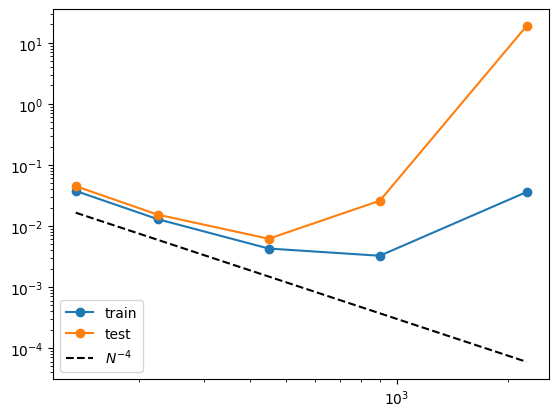

In [8]:
import numpy as np
import matplotlib.pyplot as plt

n_params = np.array(grids) * (4*9+9*1)
plt.plot(n_params, train_rmse, marker="o")
plt.plot(n_params, test_rmse, marker="o")
plt.plot(n_params, 300*n_params**(-2.), color="black", ls="--")
plt.legend(['train', 'test', r'$N^{-4}$'], loc="lower left")
plt.xscale('log')
plt.yscale('log')
print(train_rmse)
print(test_rmse)